In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn import preprocessing

In [2]:
# load iris data set
iris = load_iris()
X = preprocessing.normalize(iris.data)

In [3]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

Purity: 0.8933333333333333


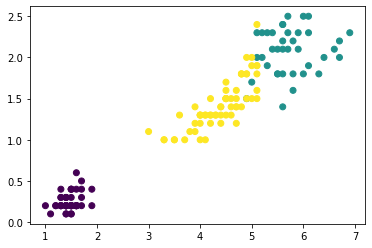

In [5]:
#Kmeans
KM = KMeans(n_clusters=3,init='random',random_state=5)
KM.fit(X)
KM.predict(X)
plt.scatter(X[:,2],X[:,3],c=KM.predict(X))

print("Purity:", purity_score(iris.target, KM.predict(X)))

In [6]:
# 階層式
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(normalized_X)

In [ ]:
# DBSCAN
